# Measuring Earth Magnetic Field Using High Altitude Balloon

## Abstract
<hr>

In physics, plasma is considered the fourth state of matter and often is refered to as an inonized gas. The previous statement refers to the fact that if matter is excited or energized beyond that of a gas, electrons can seperate from the particle itself, creating a mass of charged particles and radical electrons. This presents the unique property of interacting with electromagnetic forces, allowing plasmas to conduct electricity and be influenced by magnetic fields. This last property is what we decided to learn more about. To do so, we decided to create a payload that would be able to be attatched to a large helium balloon and carried hopefully to the stratosphere. The main purpose of the payload is to collect data on how the Earth's magnetic field varies with altitude. 

## Background
<hr>

### Earth's Magnetic Field Strength

The magnetic field around the Earth can be described by the following equation in a sperical coordinate system.<br><br>
$$\vec{B} = \frac{\mu_0}{4\pi}\frac{M_E}{r^3}\left( -2\sin\lambda\hat{e}_r + \cos\lambda\hat{e}_\lambda \right) \tag{1}$$<br>
where $r$ is the radius, $M_E = 8.05×10^{22} \text{ A m}^2$ is the magnetic dipole moment, and $\lambda$ is the magnetic latitude<sup>[1]</sup>.

The unit vectors are always perpendicular to each other so<br><br>
$$B = \sqrt{B_r^2 + B_{\lambda}^2} $$<br><br>

$$B = \left(\frac{\mu_0 M_E}{4 \pi r^3}\right)\sqrt{1 + 3\sin^2(\lambda)}$$
<br><br>

Plotting this magnetic field strength vs radius, given $\lambda = 0.872665$, yields the following plot


max B (T): 5.1684239347058986e-05
min B (T): 5.098499862826282e-05
range (T): 6.992407187961683e-07


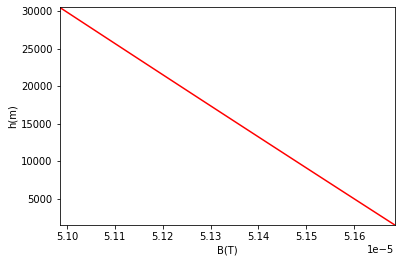

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
radius_earth = 6.371 * 10**6
latitude = 0.872665
mu_naught =  4 * np.pi * 10**-7
mag_dipole_moment = 8.05 * 10**22
step = 1000
altitude_lower = radius_earth + 1500
altitude_upper = radius_earth + 30000 + step
r = np.arange(altitude_lower,altitude_upper,step)
altitude = np.arange(1500, 30000 + step, 1000)

f = (mu_naught * mag_dipole_moment * np.sqrt(1 + 3 * (np.sin(latitude)**2))) / (4 * np.pi * r**3)
print('max B (T): ' + str(np.max(f)))
print('min B (T): ' + str(np.min(f)))
range = np.max(f) - np.min(f)
print('range (T): ' + str(range))

plt.figure()
plt.ylabel('h(m)')
plt.xlabel('B(T)')
ax = plt.gca()
ax.plot(f,altitude,'r')


ax.set_ylim([np.min(altitude), np.max(altitude)])
ax.set_xlim([np.min(f), np.max(f)])

#ax.hlines(0, 0, 40, colors='k', linestyles='dotted')

plt.show()

### Direction of Magnetic Field
<br><br><img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/earth_mag_field_vec.png" width="600px"/>

From the above diagram, the direction of the magnetic field $\alpha$ can be found by taking arctan() of the two components of the magnetic field vector.

$$\alpha = \arctan\left(\frac{\cos\lambda}{2\sin\lambda}\right)$$

So at $\lambda = 0.872665$ rads,
$$\alpha \approx 22.8^{\circ}$$

### AirTags&trade;
<hr>
As part of the experiment, we decided to test the viability of using AirTags™ to locate the balloon.  AirTags™ are small bluetooth tracking devices designed by Apple.  AirTags™ communicate via bluetooth with nearby Apple devices which are all part of the Find My network.  These devices can then send the AirTag™'s location to iCloud where it can then be viewed using the Find My app.<sup>[3]</sup>

The first question we had was whether the AirTags™ could be used to find the general location of the payload on a map, once it had landed.  This would mean that we could use them as a replacement for the Spot GPS location services.  Spot is a subscription service which requires continual payments<sup>[4]</sup>, while using AirTags™ only require an initial purchase of $29 and make use of the Find My network for free.

The second question we had was whether the AirTags™ could be used to pin-point the location of the payload once we had arrived at the landing site.  The theory was that if someone carrying an iPhone or other Apple device passed by the payload without seeing it, the AirTag™ would communicate with the device and update its location on the map, allowing us to pinpoint its location.

## Method
<hr>

### Data Collection
<div style="display: flex; justify-content: center; width: 100%; height: 200px">
<img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/gps_shield.jpg" height="200px"/>
<img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/accel.jpg" height="200px"/>
<img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/hall_sensor.jpg" height="200px"/>
</div>

For this project we made use of the Arduino Uno board due to the fact that it's scematics are open source and that we could program its microcontroller using a relatively simple coding language called Arduino C. After considering several options to collect data of payload location and shifts in the Earth's magnetic field, we ended up using three different sensors: The first sensor being Adafruit's Ulitmate GPS Logger shield to collect longitude, latitude, and altitude of our payload. Secondly we used Adafruit's ADXL345 Digital Accelerometer to capture additonal information on the movement and orientation of the payload. The third sensor we chose to use was a simple hall sensor with a {sensitivity} volt range to detect changes in magnetic field.

Because arduino unos lack sufficient memory to collect data from all of our sensors at the same time, two boards were used in our configuration. One collected GPS data from the gps sheild. The other collected data from the accelerometer and hall sensor. Data from the sensor was recorded in csv format. However GPS data was stored using a single quote as the delimeter because the GPS NMEA string contained commas.

After intial set up of the accelerometer we found that we needed to callibrate the sensor. A guide provided by Adafruit<sup>[<a href="https://learn.adafruit.com/adxl345-digital-accelerometer">5</a>]</sup> suggested to mount the sensor to a block or box and run provided code to collect positive and negative data for each axis. To do so we attached the sensor to a brick and insured the sensor was level before collecting the information. The collected data allowed us to perform a two point calibration to process new incoming data and acheive better accuracy.

Even though we were using two arduinos, the arduino responsible for collecting GPS data continued to run out of memory. We were using a slightly modified version of the sample code from the
<a href="https://github.com/adafruit/Adafruit_GPS/blob/master/examples/shield_sdlog/shield_sdlog.ino" target="_blank">Adafruit's GPS library</a>. We found that older version of the library used less memory. We were able to fix the low memory issue by using version 1.1.2 instead of the current version 1.5.4.

Using two arduinos, we needed a way to syncronize the data between them. the millis function in the arduino standard library returns the number of milliseconds since the board was turned on. For each data point recorded, we also recorded the return value of millis. To ensure the two boards were recording the milliseconds from the same start time, after we powered on the board, we pressed the reset button on each board simultaneously.

### Cameras

To collect footage of the launch we attatched a GoPro Hero 3+ to the side of the payload. For footage data we used a 32gb microSD card, and as we were concerned about memory space we ran the footage at 960p with 30 frames per second. The purpose of the footage was for visual oreintation and confirmation of key events, as well as promotional. One goal was to send Willy the Wolverine to space, we attempted to do so by taping a small stuffed version of Willy to a PVC pipe and taped the pipe to the payload so that the camera would be able to view it. After retrieving the payload, we found that the shot was misaligned and cut off Willy's head. Testing should have occured before launch to insure proper placement.

### AirTags&trade;
The AirTag&trade; was paired with an iPhone and then duct-taped to the wall inside the payload. Screenshots of the Find My app were taken periodically during the balloon's flight.

### Cleaning the Data

The data recorded was stored in to csv files. Each file had a column of data stating the time that had past since the board was powered on in milliseconds. The boards were powered on at the same time, but they collected at different rates. To unify the data, a number of operations were performed to each file. The time was divided by 1000 and rounded to the nearest second. When multiple rows had the same timestamp, all but one of the rows were deleted. Then rows that were not found in both tables were deleted using the following code.  

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt


url_accel = 'https://raw.githubusercontent.com/jammor24/ballon_data/main/accel_unique.csv'
url_gps = 'https://raw.githubusercontent.com/jammor24/ballon_data/main/gps_unique.csv'

accel_data = pd.read_csv(url_accel)
gps_data = pd.read_csv(url_gps)

data = pd.merge(accel_data, gps_data, 
                   on='time(s)', 
                   how='inner')
  





### Converting Sensor Data

The data recorded from the hall sensor was in a raw form. When the arduino makes a reading from the hall sensor it returns a number between 0 and 1023 inclusive representing a potential between 0 and 5V.<br><br>
<img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/binning.png" height="200px" style="margin-top: 50px"/>

Dividing 5V by the number of steps between 0 to 1023 gives the potential range for one step.<br><br>

$$\frac{5\text{ V}}{1024} = 4.9\text{ mV}$$

The sensor will output 3.125mV per guass of magnetic field measured, so each step represents 1.5625 gauss. A tesla is equal to 10,000 gauss, so each step was equal to
$$1.5625 \text{ G} \times \frac{1 \text{ T}}{10000 \text{ G}} = 1.5625 \times 10^{-4} \text{ T}$$
<br>

Raw magnetic field data was converted to teslas and latitude and longitude were converted from decimal minutes to decimal latitude and longitude in the code below. 

In [ ]:
# converting raw magnetic field sensor data to Teslas
conversion_factor = 1563
calibrated_B_field = data['B (Raw)']
gauss_B = calibrated_B_field * conversion_factor / 1000.0
tesla_B = gauss_B / 10000
data['B(T)'] = tesla_B


# converting gps data from degree minutes to degrees
latitude_degrees  = []
for i in data['Latitude']:
  i_str = str(round(i, 4))
  while len(i_str) < 9:
    i_str = i_str + '0'
  m = i_str[2:]
  m = float(m) / 60
  d = i_str[0: 2]
  decimal = int(d) + m
  latitude_degrees.append(decimal)

longitude_degrees  = []
for i in data['longitude']:
  i_str = str(round(i, 4))
  while len(i_str) < 9:
    i_str = i_str + '0'
  m = i_str[3:]
  m = float(m) / 60
  d = i_str[0: 3]
  decimal = -1 * (int(d) + m)
  longitude_degrees.append(decimal)

data['Latitude'] = latitude_degrees
data['longitude'] = longitude_degrees

### Flight Prediction

Prior to launching a balloon we would need to know a rough flight plan to estimate where to look for retrieval and how much helium we would need to carry our payload. To make these predictions we used the open source landing predictor tool from habhub<sup>[6]</sup>. This is a simple to use tool that allowed us to enter in the type of balloon we were using, a target burst height, the altitude and location of launch, and the weight of the payload. We recieved an estimated flight plan alongside a calculated amount of helium needed for the flight. Enteries and calculations for the habhub predictor can be seen in the images below.

<img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/Final_flight_path.png"/>

## Results
<hr>

Below are several graphs generated to help visualize the data collected. The first graph depicts altitude vs time, the peak in the data indicates when the balloon popped and the payload began to decend. The second graph depicts changes in magnetic field vs time, we assume the intial drop in field magnitude is due to handling as we sealed the payload. The third graph shows magnetic field data vs altitude. The fourth graph shows accelerometer data vs time, and the final graph shows the flight plan created from collected GPS data.

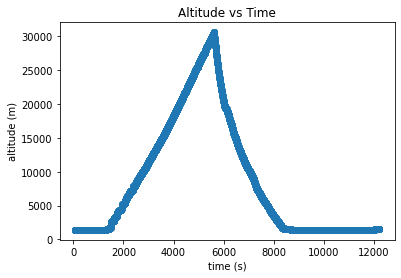

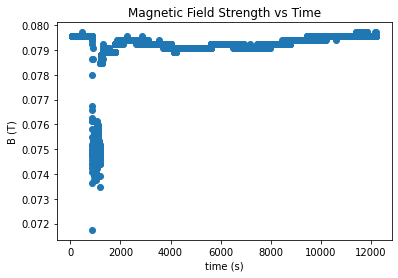

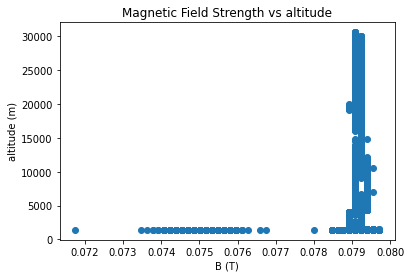

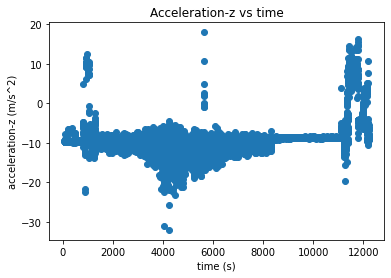

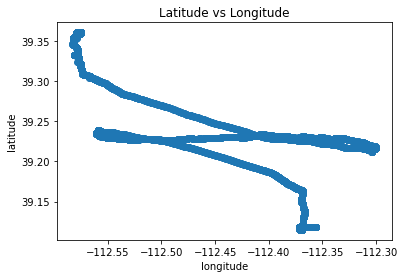

In [ ]:
# displaying results
atitude_vs_time, at = plt.subplots()
B_vs_time, bt = plt.subplots()
B_vs_altitude, ba = plt.subplots()
z_vs_time, zt = plt.subplots()
latitude_vs_longitude, ll = plt.subplots()

at.title.set_text("Altitude vs Time")
at.set_xlabel('time (s)')  # Add an x-label to the axes.
at.set_ylabel('altitude (m)')  # Add a y-label to the axes.

bt.title.set_text("Magnetic Field Strength vs Time")
bt.set_xlabel('time (s)')  # Add an x-label to the axes.
bt.set_ylabel('B (T)')  # Add a y-label to the axes.

ba.title.set_text("Magnetic Field Strength vs altitude")
ba.set_xlabel('B (T)')  # Add an x-label to the axes.
ba.set_ylabel('altitude (m)')  # Add a y-label to the axes.

ll.title.set_text("Latitude vs Longitude")
ll.set_xlabel('longitude')  # Add an x-label to the axes.
ll.set_ylabel('latitude')  # Add a y-label to the axes.

zt.title.set_text("Acceleration-z vs time")
zt.set_xlabel('time (s)')  # Add an x-label to the axes.
zt.set_ylabel('acceleration-z (m/s^2)')  # Add a y-label to the axes.

at.scatter(data['time(s)'], data['altitude'])
bt.scatter(data['time(s)'], data['B(T)'])
ba.scatter(data['B(T)'], data['altitude'])
zt.scatter(data['time(s)'], data['z (m/s^2)'])
ll.scatter(data['longitude'], data['Latitude'])

# uncomment below to download the data as a csv file
# data.to_csv('filename.csv')
# files.download('filename.csv')

### Earth's Magnetic Field

We predicted that as the balloon ascends the magnetic field strength would decrease from $5.17 \times 10^{-5} \text{ T}$ to $5.10 \times 10 ^{-5} \text{ T}$. That is a range of about $6.99 \times 10^{-7} \text{ T}$. The smallest change in magnetic field that we were able to measure is $1.5625 \times 10^{-4} \text{ T}$. This is much larger than the range of values we were expecting. Therefore, we were unable to confirm or refute our predictions.

### AirTags&trade;
The AirTag&trade; almost immediately lost contact with the rest of the network immediately after we launched.  For the entirety of the balloon flight, and even after the payload had landed, the Find My app listed the balloon's location as at the launch site, last seen at the time of launch.  From this we were able to conclude that the AirTags&trade; were not an effective replacement for the Spot GPS location services.

After arriving at the landing site, we began searching the area for the payload, which had landed in a field of alfalfa.  Upon spotting the radar-reflector less than 100 feet away, the Find My app was checked again, and the balloon's location was still listed as at the launch site.  It was not until the payload had actually been retrieved that the location of the balloon updated on the map.  From this we conclude that the AirTags&trade; may not be effective for pinpointing the location of the payload at the landing site.  However, we must also concede that the payload landed in an area with only low-growing foliage that was ideal for visual spotting.  If the payload had landed in, for example, a forested area or a corn field, then maybe the AirTags&trade; would have been more useful.

### Flight Prediction

The open source tool created by habhub provided very accurate flight plans and calculations. This can be seen in the images below. The map on the left shows the predicted flight path, and the one on the right<sup>[2]</sup> shows the actual flight path from the recorded GPS data. This information, alongside a SPOT GPS tracker, allowed us to quickly find the payload.

<div style="display: flex; justify-content: center; width: 100%; height: 300px">
<img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/predicted_flight_path.png" height="300px"/>
<img src="https://raw.githubusercontent.com/jammor24/ballon_data/main/images/actual_balloon_path.png" height="300px"/>
</div>

While the SPOT GPS tracker provided accurate GPS location for the balloon at the beginning and end of the flight. It looses signal once the balloon has reached a high enough altitude. It also didn't start sending a location until after we launched the balloon.





## Summary
<hr>

After analysing our data we found our results to be inconclusive. The change in magnetic field as the altitude increased is so small that we were unable to measure it with the hall sensor we chose. A more conclusive experiment may be done with a more sensitive sensor. Haphub and SPOT GPS tracker both were useful in finding the payload after it had landed.

## References
<hr>
<br>
[1] Earth's Magnetic Field, jupyter notebook created by Dr. Kim Nielsen 

[2] Image created using Google My Maps

[3] https://www.apple.com/airtag/

[4] https://www.findmespot.com/en-us/products-services/service-plans

[5] https://learn.adafruit.com/adxl345-digital-accelerometer

[6] https://predict.habhub.org/